# Sentimen Analisis Review Honor of Kings pada Play Store

## Import library

In [1]:
# Manipulasi dan analisis data
import pandas as pd
import numpy as np

# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Preprocessing teks
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi --quiet
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import re
import string

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Pengaturan umum
pd.options.mode.chained_assignment = None  # Menonaktifkan warning
np.random.seed(42)  # Reproducibility


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading Dataset

In [2]:
from google.colab import files

# Upload file ke Colab
uploaded = files.upload()

# Load dataset ke dalam DataFrame
df = pd.read_csv("ulasan_honor_of_kings.csv")

# Menampilkan dimensi data
print(f"Jumlah data: {df.shape[0]} baris, {df.shape[1]} kolom")

Saving ulasan_honor_of_kings.csv to ulasan_honor_of_kings (1).csv
Jumlah data: 149098 baris, 11 kolom


In [3]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,97963049-db5f-4953-99a4-2583758f4892,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Keseimbangan kekuatan di game ini buruk, tak p...",1,1530,10.3.1.5,2025-03-25 22:33:56,"Hai,\nSelain nilai dasar, damage/defense hero ...",2025-03-26 06:42:34,10.3.1.5
1,7f6414cb-ef7e-4d93-a217-2bcd9b1e1757,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Soal game ini udah bagus dari grafik dan syste...,1,207,10.3.1.5,2025-03-23 20:59:00,"Halo kak,\nMohon maaf ya, jika Anda tidak akti...",2025-03-24 03:56:00,10.3.1.5
2,cc3ed0f8-c4e0-434a-9bdf-371950b7c78d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Match Maching yg sangat buruk, menghubungkan k...",1,157,10.3.1.5,2025-03-27 09:59:20,"Hai,\nSaya menyarankan Anda mencoba metode ber...",2025-03-27 12:11:27,10.3.1.5
3,4272ed95-733e-4400-9542-43dbd5c07805,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Grafiknya bagus.. tapi ini game menyedihkan se...,1,239,10.3.1.5,2025-03-24 01:29:49,"Halo,\nJika Anda menemui pemain yang kinerjany...",2025-03-24 04:22:57,10.3.1.5
4,1d4151fb-3ec1-4e3d-bff4-44e100b29dc0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Halo, okay jd dsini sy mo berkomentar asli bag...",3,8,10.3.1.5,2025-04-10 03:08:37,"Hai pemain, \nKami memahami perasaanmu. Jika s...",2025-04-10 05:36:08,10.3.1.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149098 entries, 0 to 149097
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              149098 non-null  object
 1   userName              149098 non-null  object
 2   userImage             149098 non-null  object
 3   content               149097 non-null  object
 4   score                 149098 non-null  int64 
 5   thumbsUpCount         149098 non-null  int64 
 6   reviewCreatedVersion  108156 non-null  object
 7   at                    149098 non-null  object
 8   replyContent          28078 non-null   object
 9   repliedAt             28078 non-null   object
 10  appVersion            108156 non-null  object
dtypes: int64(2), object(9)
memory usage: 12.5+ MB


In [5]:
# Melihat jumlah data yang null di setiap kolom
print("\nJumlah data null per kolom:")
print(df.isnull().sum())


Jumlah data null per kolom:
reviewId                     0
userName                     0
userImage                    0
content                      1
score                        0
thumbsUpCount                0
reviewCreatedVersion     40942
at                           0
replyContent            121020
repliedAt               121020
appVersion               40942
dtype: int64


In [6]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai NaN
clean_df = df.dropna()

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17769 entries, 0 to 135690
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              17769 non-null  object
 1   userName              17769 non-null  object
 2   userImage             17769 non-null  object
 3   content               17769 non-null  object
 4   score                 17769 non-null  int64 
 5   thumbsUpCount         17769 non-null  int64 
 6   reviewCreatedVersion  17769 non-null  object
 7   at                    17769 non-null  object
 8   replyContent          17769 non-null  object
 9   repliedAt             17769 non-null  object
 10  appVersion            17769 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.6+ MB


In [8]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape
print(f"Jumlah ulasan setelah dibersihkan: {jumlah_ulasan_setelah_hapus_duplikat}")

Jumlah ulasan setelah dibersihkan: 17769


## Prepocessing

In [9]:
# 1. Cleaning Text
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text.strip()

# 2. Case Folding
def casefoldingText(text):
    return text.lower()

# 3. Tokenizing
def tokenizingText(text):
    return word_tokenize(text)

# 4. Stopword Filtering
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords.update(stopwords.words('english'))
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    return [word for word in text if word not in listStopwords]

# 5. Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmingText(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

# 6. Kembali ke kalimat
def toSentence(tokens):
    return ' '.join(tokens)

In [10]:
nltk.download('punkt_tab')

# Urutan pemrosesan teks
# 1. Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# 2. Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# 3. Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_casefoldingText'].apply(tokenizingText)

# 4. Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# 5. Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [11]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_akhir
0,97963049-db5f-4953-99a4-2583758f4892,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Keseimbangan kekuatan di game ini buruk, tak p...",1,1530,10.3.1.5,2025-03-25 22:33:56,"Hai,\nSelain nilai dasar, damage/defense hero ...",2025-03-26 06:42:34,10.3.1.5,Keseimbangan kekuatan di game ini buruk tak pe...,keseimbangan kekuatan di game ini buruk tak pe...,"[keseimbangan, kekuatan, di, game, ini, buruk,...","[keseimbangan, kekuatan, game, buruk, peduli, ...",keseimbangan kekuatan game buruk peduli level ...
1,7f6414cb-ef7e-4d93-a217-2bcd9b1e1757,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Soal game ini udah bagus dari grafik dan syste...,1,207,10.3.1.5,2025-03-23 20:59:00,"Halo kak,\nMohon maaf ya, jika Anda tidak akti...",2025-03-24 03:56:00,10.3.1.5,Soal game ini udah bagus dari grafik dan syste...,soal game ini udah bagus dari grafik dan syste...,"[soal, game, ini, udah, bagus, dari, grafik, d...","[game, udah, bagus, grafik, system, matchmakin...",game udah bagus grafik system matchmaking prob...
2,cc3ed0f8-c4e0-434a-9bdf-371950b7c78d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Match Maching yg sangat buruk, menghubungkan k...",1,157,10.3.1.5,2025-03-27 09:59:20,"Hai,\nSaya menyarankan Anda mencoba metode ber...",2025-03-27 12:11:27,10.3.1.5,Match Maching yg sangat buruk menghubungkan ke...,match maching yg sangat buruk menghubungkan ke...,"[match, maching, yg, sangat, buruk, menghubung...","[match, maching, yg, buruk, menghubungkan, sin...",match maching yg buruk menghubungkan sinyal si...
3,4272ed95-733e-4400-9542-43dbd5c07805,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Grafiknya bagus.. tapi ini game menyedihkan se...,1,239,10.3.1.5,2025-03-24 01:29:49,"Halo,\nJika Anda menemui pemain yang kinerjany...",2025-03-24 04:22:57,10.3.1.5,Grafiknya bagus tapi ini game menyedihkan seka...,grafiknya bagus tapi ini game menyedihkan seka...,"[grafiknya, bagus, tapi, ini, game, menyedihka...","[grafiknya, bagus, game, menyedihkan, sistem, ...",grafiknya bagus game menyedihkan sistem match ...
4,1d4151fb-3ec1-4e3d-bff4-44e100b29dc0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Halo, okay jd dsini sy mo berkomentar asli bag...",3,8,10.3.1.5,2025-04-10 03:08:37,"Hai pemain, \nKami memahami perasaanmu. Jika s...",2025-04-10 05:36:08,10.3.1.5,Halo okay jd dsini sy mo berkomentar asli bagi...,halo okay jd dsini sy mo berkomentar asli bagi...,"[halo, okay, jd, dsini, sy, mo, berkomentar, a...","[halo, okay, jd, dsini, sy, mo, berkomentar, a...",halo okay jd dsini sy mo berkomentar asli yg m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,6caf0f24-718f-4f00-9bef-f305f92c3d41,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Very unbalanced game at all.. I'm pretty sure ...,1,71,8.3.1.4,2023-07-08 20:57:57,"Hi, Demi Honorofking!\nWe are sorry for the un...",2023-07-12 07:02:07,8.3.1.4,Very unbalanced game at all Im pretty sure it ...,very unbalanced game at all im pretty sure it ...,"[very, unbalanced, game, at, all, im, pretty, ...","[unbalanced, game, im, pretty, sure, wont, sel...",unbalanced game im pretty sure wont sell globa...
135649,9ce99d1a-eb8b-4f2b-8c66-e7922d84d130,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Thank you for the review after that it can alr...,5,2,8.3.1.4,2023-07-18 07:36:16,"Hi, Ibram Raka W!\nWe suggest you try the foll...",2023-07-18 07:15:15,8.3.1.4,Thank you for the review after that it can alr...,thank you for the review after that it can alr...,"[thank, you, for, the, review, after, that, it...","[thank, review, already, thanks]",thank review already thanks
135651,68ac110a-e10e-4e56-b9c8-e0fe4886f5f0,Pengguna Google,https://play-lh.googleusercontent.co

In [12]:
clean_df = clean_df.drop(columns=['text_casefolding', 'text_token', 'text_filtered'], errors='ignore')

In [13]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_akhir
0,97963049-db5f-4953-99a4-2583758f4892,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Keseimbangan kekuatan di game ini buruk, tak p...",1,1530,10.3.1.5,2025-03-25 22:33:56,"Hai,\nSelain nilai dasar, damage/defense hero ...",2025-03-26 06:42:34,10.3.1.5,Keseimbangan kekuatan di game ini buruk tak pe...,keseimbangan kekuatan di game ini buruk tak pe...,"[keseimbangan, kekuatan, di, game, ini, buruk,...","[keseimbangan, kekuatan, game, buruk, peduli, ...",keseimbangan kekuatan game buruk peduli level ...
1,7f6414cb-ef7e-4d93-a217-2bcd9b1e1757,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Soal game ini udah bagus dari grafik dan syste...,1,207,10.3.1.5,2025-03-23 20:59:00,"Halo kak,\nMohon maaf ya, jika Anda tidak akti...",2025-03-24 03:56:00,10.3.1.5,Soal game ini udah bagus dari grafik dan syste...,soal game ini udah bagus dari grafik dan syste...,"[soal, game, ini, udah, bagus, dari, grafik, d...","[game, udah, bagus, grafik, system, matchmakin...",game udah bagus grafik system matchmaking prob...
2,cc3ed0f8-c4e0-434a-9bdf-371950b7c78d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Match Maching yg sangat buruk, menghubungkan k...",1,157,10.3.1.5,2025-03-27 09:59:20,"Hai,\nSaya menyarankan Anda mencoba metode ber...",2025-03-27 12:11:27,10.3.1.5,Match Maching yg sangat buruk menghubungkan ke...,match maching yg sangat buruk menghubungkan ke...,"[match, maching, yg, sangat, buruk, menghubung...","[match, maching, yg, buruk, menghubungkan, sin...",match maching yg buruk menghubungkan sinyal si...
3,4272ed95-733e-4400-9542-43dbd5c07805,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Grafiknya bagus.. tapi ini game menyedihkan se...,1,239,10.3.1.5,2025-03-24 01:29:49,"Halo,\nJika Anda menemui pemain yang kinerjany...",2025-03-24 04:22:57,10.3.1.5,Grafiknya bagus tapi ini game menyedihkan seka...,grafiknya bagus tapi ini game menyedihkan seka...,"[grafiknya, bagus, tapi, ini, game, menyedihka...","[grafiknya, bagus, game, menyedihkan, sistem, ...",grafiknya bagus game menyedihkan sistem match ...
4,1d4151fb-3ec1-4e3d-bff4-44e100b29dc0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Halo, okay jd dsini sy mo berkomentar asli bag...",3,8,10.3.1.5,2025-04-10 03:08:37,"Hai pemain, \nKami memahami perasaanmu. Jika s...",2025-04-10 05:36:08,10.3.1.5,Halo okay jd dsini sy mo berkomentar asli bagi...,halo okay jd dsini sy mo berkomentar asli bagi...,"[halo, okay, jd, dsini, sy, mo, berkomentar, a...","[halo, okay, jd, dsini, sy, mo, berkomentar, a...",halo okay jd dsini sy mo berkomentar asli yg m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,6caf0f24-718f-4f00-9bef-f305f92c3d41,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Very unbalanced game at all.. I'm pretty sure ...,1,71,8.3.1.4,2023-07-08 20:57:57,"Hi, Demi Honorofking!\nWe are sorry for the un...",2023-07-12 07:02:07,8.3.1.4,Very unbalanced game at all Im pretty sure it ...,very unbalanced game at all im pretty sure it ...,"[very, unbalanced, game, at, all, im, pretty, ...","[unbalanced, game, im, pretty, sure, wont, sel...",unbalanced game im pretty sure wont sell globa...
135649,9ce99d1a-eb8b-4f2b-8c66-e7922d84d130,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Thank you for the review after that it can alr...,5,2,8.3.1.4,2023-07-18 07:36:16,"Hi, Ibram Raka W!\nWe suggest you try the foll...",2023-07-18 07:15:15,8.3.1.4,Thank you for the review after that it can alr...,thank you for the review after that it can alr...,"[thank, you, for, the, review, after, that, it...","[thank, review, already, thanks]",thank review already thanks
135651,68ac110a-e10e-4e56-b9c8-e0fe4886f5f0,Pengguna Google,https://play-lh.googleusercontent.co

## Pelabelan

In [25]:
import csv
import requests
from io import StringIO

# Membaca kamus kata positif dari GitHub
lexicon_positive = dict()
response_positive = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response_positive.status_code == 200:
    reader = csv.reader(StringIO(response_positive.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])  # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca kamus kata negatif dari GitHub
lexicon_negative = dict()
response_negative = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response_negative.status_code == 200:
    reader = csv.reader(StringIO(response_negative.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])  # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


# Fungsi untuk menganalisis sentimen
def sentiment_analysis_lexicon_indonesia(text, rating):
    score = 0
    # Menghitung skor berdasarkan kata-kata yang ada dalam kamus positif
    for word in text.split():
        if word in lexicon_positive:
            score += lexicon_positive[word]  # Menambahkan skor kata positif

    # Menghitung skor berdasarkan kata-kata yang ada dalam kamus negatif
    for word in text.split():
        if word in lexicon_negative:
            score -= lexicon_negative[word]  # Mengurangi skor kata negatif

    # Jika rating 3, tentukan kategorinya berdasarkan kata-kata dalam teks
    if rating == 3:
        if score > 0:
            return 'positif'
        elif score < 0:
            return 'negatif'
        else:
            return 'positif'
    # Menentukan polaritas berdasarkan skor
    if score > 0:
        return 'positif'
    elif score < 0:
        return 'negatif'
    else:
        return 'negatif'



In [26]:
# Menerapkan analisis sentimen ke kolom 'content' pada DataFrame dan menggunakan rating untuk pelabelan
clean_df['sentimen'] = clean_df.apply(lambda row: sentiment_analysis_lexicon_indonesia(row['content'], row['score']), axis=1)

# Menampilkan distribusi sentimen
print(clean_df['sentimen'].value_counts())

sentimen
positif    16079
negatif     1690
Name: count, dtype: int64


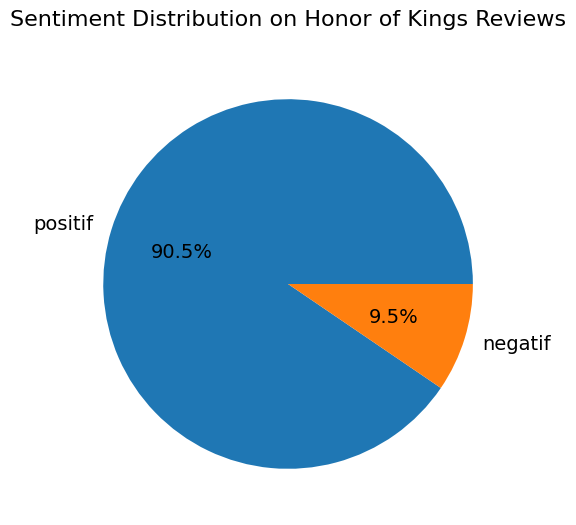

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in clean_df['sentimen'].value_counts()]
labels = list(clean_df['sentimen'].value_counts().index)
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})
ax.set_title('Sentiment Distribution on Honor of Kings Reviews', fontsize=16, pad=20)
plt.show()


## Data Splitting

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

# Fitur dan target
X = clean_df['text_akhir']
y = clean_df['sentimen']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=1000, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

# Bag of Words (BoW) Vectorization
bow = CountVectorizer(max_features=1000, min_df=17, max_df=0.8)
X_bow = bow.fit_transform(X)

In [30]:
# Menampilkan hasil ekstraksi fitur untuk BoW dan TF-IDF
print(f"Shape of TF-IDF features: {X_tfidf.shape}")
print(f"Shape of BoW features: {X_bow.shape}")

Shape of TF-IDF features: (17769, 1000)
Shape of BoW features: (17769, 1000)


In [31]:
# Pembagian data untuk eksperimen pertama dan kedua (80/20)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y, test_size=0.2, random_state=42, stratify=y)

# Pembagian data untuk eksperimen ketiga (70/30)
X_train_tfidf_70, X_test_tfidf_30, y_train_70, y_test_30 = train_test_split(X_tfidf, y, test_size=0.3, random_state=42, stratify=y)

## Modeling

### Model 1: Logistic Regression dengan TF-IDF

In [32]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_tfidf, y_train)

# Prediksi sentimen pada data latih dan uji
y_pred_train_lr = logistic_regression.predict(X_train_tfidf)
y_pred_test_lr = logistic_regression.predict(X_test_tfidf)

# Evaluasi akurasi pada data latih dan uji
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print(f'Logistic Regression - accuracy_train: {accuracy_train_lr}')
print(f'Logistic Regression - accuracy_test: {accuracy_test_lr}')

Logistic Regression - accuracy_train: 0.9084769609567358
Logistic Regression - accuracy_test: 0.9060213843556556


### 2. Model Random Forest dengan BoW (80/20)

In [33]:
random_forest_bow = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_bow.fit(X_train_bow, y_train_bow)

# Prediksi sentimen pada data latih dan uji
y_pred_train_rf_bow = random_forest_bow.predict(X_train_bow)
y_pred_test_rf_bow = random_forest_bow.predict(X_test_bow)

# Evaluasi akurasi pada data latih dan uji
accuracy_train_rf_bow = accuracy_score(y_pred_train_rf_bow, y_train_bow)
accuracy_test_rf_bow = accuracy_score(y_pred_test_rf_bow, y_test_bow)

# Menampilkan akurasi
print(f'Random Forest with BoW - accuracy_train: {accuracy_train_rf_bow}')
print(f'Random Forest with BoW - accuracy_test: {accuracy_test_rf_bow}')

Random Forest with BoW - accuracy_train: 0.9693985226873022
Random Forest with BoW - accuracy_test: 0.9054586381541925


### 3. Model Random Forest dengan TF-IDF (70/30)

In [34]:
random_forest_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_tfidf.fit(X_train_tfidf_70, y_train_70)

# Prediksi sentimen pada data latih dan uji
y_pred_train_rf_tfidf = random_forest_tfidf.predict(X_train_tfidf_70)
y_pred_test_rf_tfidf = random_forest_tfidf.predict(X_test_tfidf_30)

# Evaluasi akurasi pada data latih dan uji
accuracy_train_rf_tfidf = accuracy_score(y_pred_train_rf_tfidf, y_train_70)
accuracy_test_rf_tfidf = accuracy_score(y_pred_test_rf_tfidf, y_test_30)

# Menampilkan akurasi
print(f'Random Forest with TF-IDF (70/30) - accuracy_train: {accuracy_train_rf_tfidf}')
print(f'Random Forest with TF-IDF (70/30) - accuracy_test: {accuracy_test_rf_tfidf}')

Random Forest with TF-IDF (70/30) - accuracy_train: 0.9696092619392185
Random Forest with TF-IDF (70/30) - accuracy_test: 0.9037703995498031


In [35]:
# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest with BoW', 'Random Forest with TF-IDF (70/30)'],
    'Accuracy Test': [accuracy_test_lr, accuracy_test_rf_bow, accuracy_test_rf_tfidf]  # Akurasi dari model yang telah dilatih
})

# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = results_df.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)


                               Model  Accuracy Test
0                Logistic Regression       0.906021
1             Random Forest with BoW       0.905459
2  Random Forest with TF-IDF (70/30)       0.903770


In [41]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)  # Menghapus karakter-karakter yang tidak perlu
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)  # Mengubah semua huruf menjadi huruf kecil
kalimat_baru_tokenized = tokenizingText(kalimat_baru_casefolded)  # Tokenisasi kata-kata
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)  # Menghapus stop words
kalimat_baru_final = toSentence(kalimat_baru_filtered)  # Menggabungkan token kembali menjadi kalimat

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru menggunakan model Logistic Regression
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positif':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: game nya bagus dan skill hero unik
Sentimen kalimat baru adalah POSITIF.
